In [1]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import seaborn as sns
import matplotlib.pyplot as plt
import math
import itertools
import time

In [2]:
songs = pd.read_csv('API Scraping Data/pop2000_2023.csv')

In [3]:
songs = songs[songs['popularity'] >= 50]

<AxesSubplot:xlabel='popularity', ylabel='Count'>

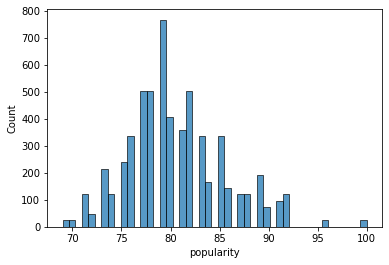

In [4]:
sns.histplot(data = songs, x = 'popularity')

In [5]:
songs['pop'] = [1 if x >= 80 else 0 for x in songs['popularity'] ]

In [6]:
list(songs.columns)

['popularity',
 'year',
 'genre',
 'danceability',
 'energy',
 'key',
 'loudness',
 'mode',
 'speechiness',
 'acousticness',
 'instrumentalness',
 'liveness',
 'valence',
 'tempo',
 'type',
 'id',
 'uri',
 'track_href',
 'analysis_url',
 'duration_ms',
 'time_signature',
 'pop']

In [7]:
binned = pd.qcut(songs['tempo'], 10, retbins = True)
songs['binned'] = binned[0]
songs

,popularity,year,genre,danceability,energy,key,loudness,mode,speechiness,acousticness,...,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature,pop,binned
0,100,2000,pop,0.707,0.681,0,-4.325,1,0.0668,0.06320,...,117.999,audio_features,0yLdNVWF3Srea0uzk55zFn,spotify:track:0yLdNVWF3Srea0uzk55zFn,https://api.spotify.com/v1/tracks/0yLdNVWF3Sre...,https://api.spotify.com/v1/audio-analysis/0yLd...,200455,4,1,"(110.898, 117.999]"
1,92,2000,pop,0.644,0.728,8,-5.750,1,0.0351,0.05430,...,88.993,audio_features,3OHfY25tqY28d16oZczHc8,spotify:track:3OHfY25tqY28d16oZczHc8,https://api.spotify.com/v1/tracks/3OHfY25tqY28...,https://api.spotify.com/v1/audio-analysis/3OHf...,153947,4,1,"(85.012, 96.107]"
2,92,2000,pop,0.644,0.735,8,-5.747,1,0.0391,0.05210,...,88.980,audio_features,1Qrg8KqiBpW07V7PNxwwwL,spotify:track:1Qrg8KqiBpW07V7PNxwwwL,https://api.spotify.com/v1/tracks/1Qrg8KqiBpW0...,https://api.spotify.com/v1/audio-analysis/1Qrg...,153947,4,1,"(85.012, 96.107]"
3,90,2000,pop,0.684,0.607,11,-8.127,0,0.1000,0.02670,...,81.001,audio_features,0JXXNGljqupsJaZsgSbMZV,spotify:track:0JXXNGljqupsJaZsgSbMZV,https://api.spotify.com/v1/tracks/0JXXNGljqups...,https://api.spotify.com/v1/audio-analysis/0JXX...,195373,4,1,"(61.858000000000004, 85.012]"
4,89,2000,pop,0.561,0.520,11,-9.342,0,0.2440,0.05030,...,153.150,audio_features,1bDbXMyjaUIooNwFE9wn0N,spotify:track:1bDbXMyjaUIooNwFE9wn0N,https://api.spotify.com/v1/tracks/1bDbXMyjaUIo...,https://api.spotify.com/v1/audio-analysis/1bDb...,239360,3,1,"(141.967, 159.969]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,82,2023,pop,0.792,0.625,1,-5.609,1,0.0536,0.00776,...,103.967,audio_features,1zi7xx7UVEFkmKfv06H8x0,spotify:track:1zi7xx7UVEFkmKfv06H8x0,https://api.spotify.com/v1/tracks/1zi7xx7UVEFk...,https://api.spotify.com/v1/audio-analysis/1zi7...,173987,4,1,"(96.107, 104.948]"
5996,81,2023,pop,0.748,0.524,8,-5.599,1,0.0338,0.41400,...,95.010,audio_features,7BKLCZ1jbUBVqRi2FVlTVw,spotify:track:7BKLCZ1jbUBVqRi2FVlTVw,https://api.spotify.com/v1/tracks/7BKLCZ1jbUBV...,https://api.spotify.com/v1/audio-analysis/7BKL...,244960,4,1,"(85.012, 96.107]"
5997,77,2023,pop,0.608,0.756,7,-2.675,0,0.1760,0.07840,...,176.086,audio_features,5BKKy9fIJL5uM9fz1SnqyP,spotify:track:5BKKy9fIJL5uM9fz1SnqyP,https://api.spotify.com/v1/tracks/5BKKy9fIJL5u...,https://api.spotify.com/v1/audio-analysis/5BKK...,245507,4,0,"(159.969, 186.003]"
5998,77,2023,pop,0.734,0.605,1,-8.476,1,0.0699,0.01020,...,103.976,audio_features,7GeTsDIc5ykNB6lORO6Cee,spotify:track:7GeTsDIc5ykNB6lORO6Cee,https://api.spotify.com/v1/tracks/7GeTsDIc5ykN...,https://api.spotify.com/v1/audio-analysis/7GeT...,236795,4,0,"(96.107, 104.948]"


In [8]:
binned_data = songs.groupby('binned')['pop'].agg([('outcome_pct', 'mean'), ('nobs','count')]).reset_index(drop=False)
binned_data

,binned,outcome_pct,nobs
0,"(61.858000000000004, 85.012]",0.400,600
1,"(85.012, 96.107]",0.520,600
2,"(96.107, 104.948]",0.520,600
3,"(104.948, 110.898]",0.500,576
4,"(110.898, 117.999]",0.440,600
5,"(117.999, 124.921]",0.360,600
6,"(124.921, 132.052]",0.625,576
7,"(132.052, 141.967]",0.640,600
8,"(141.967, 159.969]",0.480,600
9,"(159.969, 186.003]",0.625,576


Text(0.5, 0, 'Bin')

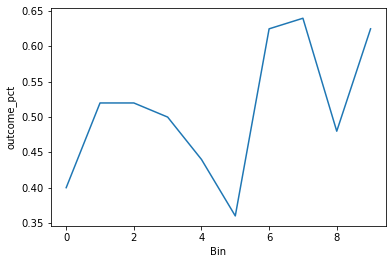

In [9]:
sns.lineplot(x = binned_data.index, y= binned_data['outcome_pct'])
plt.xlabel('Bin')

In [10]:
y1950 = pd.read_csv('Kaggle Data/1950.xls')
y1960 = pd.read_csv('Kaggle Data/1960.xls')
y1970 = pd.read_csv('Kaggle Data/1970.xls')
y1980 = pd.read_csv('Kaggle Data/1980.xls')
y1990 = pd.read_csv('Kaggle Data/1990.xls')
y2000 = pd.read_csv('Kaggle Data/2000.xls')
y2010 = pd.read_csv('Kaggle Data/2010.xls')

In [11]:
y1950['decade'] = 1950
y1960['decade'] = 1960
y1970['decade'] = 1970
y1980['decade'] = 1980
y1990['decade'] = 1990
y2000['decade'] = 2000
y2010['decade'] = 2010

In [12]:
all_data = pd.concat([y1950,y1960,y1970,y1980,y1990,y2000,y2010])

In [13]:
all_data

,Number,title,artist,top genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop,decade
0,1,Put Your Head On My Shoulder,Paul Anka,adult standards,2000,116,34,55,-9,10,47,155,75,3,72,1950
1,2,Whatever Will Be Will Be (Que Sera Sera) (with...,Doris Day,adult standards,1948,177,34,42,-11,72,78,123,86,4,62,1950
2,3,Everybody Loves Somebody,Dean Martin,adult standards,2013,81,49,26,-9,34,40,162,81,4,61,1950
3,4,Take Good Care Of My Baby - 1990 Remastered,Bobby Vee,adult standards,2011,82,43,49,-12,12,66,151,70,6,60,1950
4,5,A Teenager In Love,Dion & The Belmonts,adult standards,1959,79,38,56,-9,13,62,158,67,3,60,1950
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,Stereo Hearts (feat. Adam Levine),Gym Class Heroes,dance pop,2011,90,80,65,-3,27,80,211,3,10,56,2010
96,97,Dynamite,Taio Cruz,dance pop,2011,120,79,76,-4,3,87,203,0,8,56,2010
97,98,Break Your Heart,Taio Cruz,dance pop,2011,122,89,67,-5,24,68,185,0,3,54,2010
98,99,Summer Air,ItaloBrothers,dance pop,2017,102,75,76,-4,8,49,184,6,7,43,2010


In [14]:
from sklearn.model_selection import train_test_split
X = all_data.drop('pop', axis=1)
y = all_data['pop']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
train = pd.concat([X_train, y_train], axis=1)
test = pd.concat([X_test, y_test], axis=1)

In [15]:
ols_object = smf.ols(formula = 'pop~(dB + live + val + acous + dnce + nrgy + bpm)**2', data = train)

model = ols_object.fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    pop   R-squared:                       0.376
Model:                            OLS   Adj. R-squared:                  0.341
Method:                 Least Squares   F-statistic:                     10.84
Date:                Mon, 27 Feb 2023   Prob (F-statistic):           3.23e-36
Time:                        23:32:18   Log-Likelihood:                -2010.7
No. Observations:                 533   AIC:                             4079.
Df Residuals:                     504   BIC:                             4204.
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     69.2119     31.573      2.192      0.029       7.180     131.244
dB            -1.8631      1.536     -1.213      0.226      -4.880       1.154
live           0.0295      0.359      0.082      0.935      -0.676       0.735
val           -0.2271      0.252     -0.901      0.368      -0.722       0.268
acous         -0.5516      0.234     -2.357      0.019      -1.011      -0.092
dnce           0.4774      0.341      1.398      0.163      -0.193       1.148
nrgy          -0.0193      0.333     -0.058      0.954      -0.673       0.634
bpm           -0.0853      0.185     -0.461      0.645      -0.449       0.278
dB:live        0.0212      0.015      1.420      0.156      -0.008       0.050
dB:val        -0.0113      0.010     -1.142      0.254      -0.031       0.008
dB:acous       0.0042      0.009      0.449      0.654      -0.014       0.023
dB:dnce        0.0280      0.016      1.740      0.082      -0.004       0.060
dB:nrgy        0.0070      0.010      0.727      0.468      -0.012       0.026
dB:bpm         0.0077      0.008      0.975      0.330      -0.008       0.023
live:val       0.0018      0.002      0.943      0.346      -0.002       0.005
live:acous    -0.0005      0.002     -0.251      0.802      -0.004       0.003
live:dnce      0.0005      0.003      0.179      0.858      -0.005       0.006
live:nrgy      0.0010      0.003      0.359      0.720      -0.004       0.006
live:bpm      -0.0009      0.001     -0.666      0.506      -0.004       0.002
val:acous     -0.0017      0.001     -1.384      0.167      -0.004       0.001
val:dnce       0.0010      0.002      0.603      0.547      -0.002       0.004
val:nrgy       0.0031      0.002      1.721      0.086      -0.000       0.007
val:bpm       -0.0019      0.001     -1.921      0.055      -0.004    4.34e-05
acous:dnce     0.0010      0.002      0.527      0.598      -0.003       0.005
acous:nrgy     0.0030      0.002      1.966      0.050    2.33e-06       0.006
acous:bpm      0.0026      0.001      2.623      0.009       0.001       0.005
dnce:nrgy     -0.0075      0.003     -2.358      0.019      -0.014      -0.001
dnce:bpm       0.0024      0.002      1.524      0.128      -0.001       0.006
nrgy:bpm       0.0013      0.002      0.723      0.470      -0.002       0.005
==============================================================================
Omnibus:                       19.381   Durbin-Watson:                   1.874
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               20.483
Skew:                          -0.462   Prob(JB):                     3.57e-05
Kurtosis:                       3.261   Cond. No.                     1.07e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is co

In [16]:
pred_pop = model.predict(test)
print(np.sqrt(((test['pop'] - pred_pop)**2).mean()))

13.384546640498625


In [17]:
pred_pop = model.predict(train)
print(np.sqrt(((train['pop'] - pred_pop)**2).mean()))

10.52247875584465


In [18]:
def best_sub_plots():
    plt.figure(figsize=(20,10))
    plt.rcParams.update({'font.size': 18, 'lines.markersize': 10})

    # Set up a 2x2 grid so we can look at 4 plots at once
    plt.subplot(2, 2, 1)

    # We will now plot a red dot to indicate the model with the largest adjusted R^2 statistic.
    # The argmax() function can be used to identify the location of the maximum point of a vector
    plt.plot(models_best["Rsquared"])
    plt.xlabel('# Predictors')
    plt.ylabel('Rsquared')

    # We will now plot a red dot to indicate the model with the largest adjusted R^2 statistic.
    # The argmax() function can be used to identify the location of the maximum point of a vector

    rsquared_adj = models_best.apply(lambda row: row[1].rsquared_adj, axis=1)

    plt.subplot(2, 2, 2)
    plt.plot(rsquared_adj)
    plt.plot(1+rsquared_adj.argmax(), rsquared_adj.max(), "or")
    plt.xlabel('# Predictors')
    plt.ylabel('adjusted rsquared')

    # We'll do the same for AIC and BIC, this time looking for the models with the SMALLEST statistic
    aic = models_best.apply(lambda row: row[1].aic, axis=1)

    plt.subplot(2, 2, 3)
    plt.plot(aic)
    plt.plot(1+aic.argmin(), aic.min(), "or")
    plt.xlabel('# Predictors')
    plt.ylabel('AIC')

    bic = models_best.apply(lambda row: row[1].bic, axis=1)

    plt.subplot(2, 2, 4)
    plt.plot(bic)
    plt.plot(1+bic.argmin(), bic.min(), "or")
    plt.xlabel('# Predictors')
    plt.ylabel('BIC')

In [19]:
X = train[['bpm', 'nrgy', 'dnce', 'dB', 'live', 'val', 'dur', 'acous', 'spch']]

#Function to develop a model based on all predictors in predictor_subset
def processSubset(predictor_subset):
    # Fit model on feature_set and calculate R-squared
    model = sm.ols('pop~' + '+'.join(predictor_subset),data = train).fit()
    Rsquared = model.rsquared
    return {"model":model, "Rsquared":Rsquared}

In [20]:
#Function to find the best predictor out of p-k predictors and add it to the model containing the k predictors
def forward(predictors):

    # Pull out predictors we still need to process
    remaining_predictors = [p for p in X.columns if p not in predictors]
    
    tic = time.time()
    
    results = []
    
    for p in remaining_predictors:
        results.append(processSubset(predictors+[p]))
    
    # Wrap everything up in a nice dataframe
    models = pd.DataFrame(results)
    
    # Choose the model with the highest RSS
    best_model = models.loc[models['Rsquared'].argmax()]
    
    toc = time.time()
    print("Processed ", models.shape[0], "models on", len(predictors)+1, "predictors in", (toc-tic), "seconds.")
    
    # Return the best model, along with some other useful information about the model
    return best_model

In [25]:
def forward_selection():
    models_best = pd.DataFrame(columns=["Rsquared", "model"])

    tic = time.time()
    predictors = []

    for i in range(1,len(X.columns)+1):    
        models_best.loc[i] = forward(predictors)
        predictors = list(models_best.loc[i]["model"].params.index[1:])

    toc = time.time()
    print("Total elapsed time:", (toc-tic), "seconds.")
    return models_best

In [30]:
import statsmodels.formula.api as sm

#Function to select the best model amongst all models with 'k' predictors
def getBest_model(k):
    tic = time.time()
    results = []
    for combo in itertools.combinations(X.columns, k):
        results.append(processSubset((list(combo))))

    # Wrap everything up in a dataframe
    models = pd.DataFrame(results)

    # Choose the model with the highest RSS
    best_model = models.loc[models['Rsquared'].argmax()]
    
    toc = time.time()
    print("Processed", models.shape[0], "models on", k, "predictors in", (toc-tic), "seconds.")
    return best_model

In [31]:
models_best = forward_selection()

Processed  9 models on 1 predictors in 0.03180193901062012 seconds.
Processed  8 models on 2 predictors in 0.04058265686035156 seconds.
Processed  7 models on 3 predictors in 0.024591922760009766 seconds.
Processed  6 models on 4 predictors in 0.031343936920166016 seconds.
Processed  5 models on 5 predictors in 0.015627622604370117 seconds.
Processed  4 models on 6 predictors in 0.031233549118041992 seconds.
Processed  3 models on 7 predictors in 0.03127026557922363 seconds.
Processed  2 models on 8 predictors in 0.022818326950073242 seconds.
Processed  1 models on 9 predictors in 0.009000301361083984 seconds.
Total elapsed time: 0.24327898025512695 seconds.


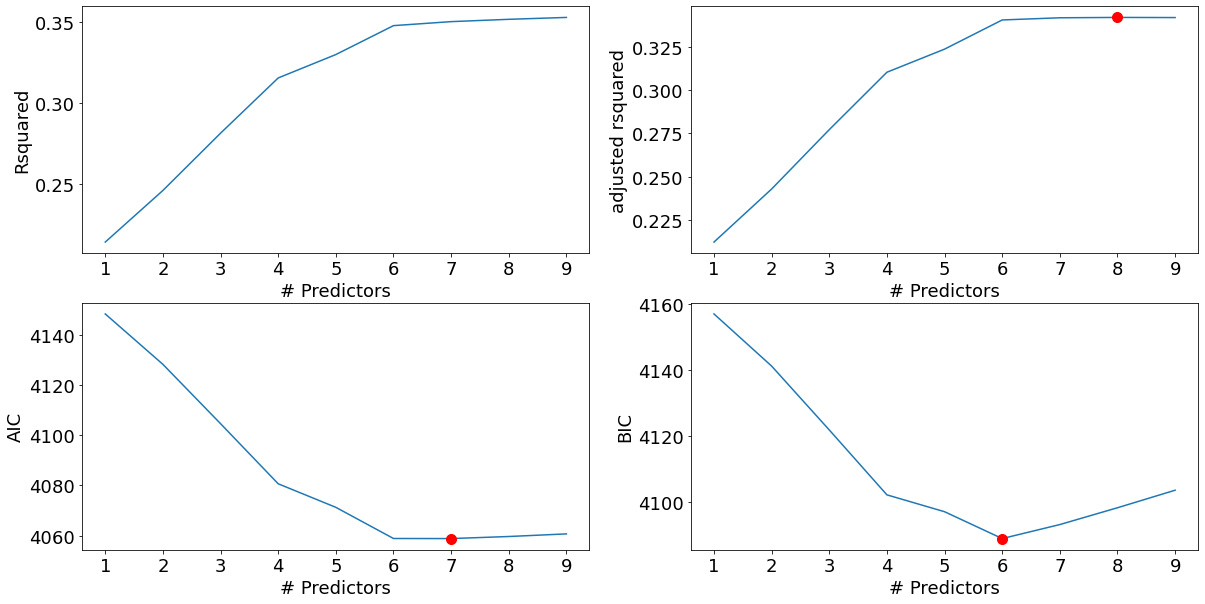

In [32]:
best_sub_plots()

In [33]:
best_fwd_reg_model = models_best['model'][6]
best_fwd_reg_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    pop   R-squared:                       0.348
Model:                            OLS   Adj. R-squared:                  0.340
Method:                 Least Squares   F-statistic:                     46.75
Date:                Mon, 27 Feb 2023   Prob (F-statistic):           6.53e-46
Time:                        23:35:57   Log-Likelihood:                -2022.4
No. Observations:                 533   AIC:                             4059.
Df Residuals:                     526   BIC:                             4089.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     70.5827      4.697     15.026      0.000      61.355      79.811
acous         -0.1697      0.024     -7.090      0.000      -0.217      -0.123
dur            0.0389      0.008      4.674      0.000       0.023       0.055
dB             1.0767      0.194      5.543      0.000       0.695       1.458
nrgy          -0.1181      0.041     -2.873      0.004      -0.199      -0.037
dnce           0.1801      0.038      4.742      0.000       0.105       0.255
val           -0.0961      0.025     -3.799      0.000      -0.146      -0.046
==============================================================================
Omnibus:                       11.190   Durbin-Watson:                   1.860
Prob(Omnibus):                  0.004   Jarque-Bera (JB):               11.409
Skew:                          -0.357   Prob(JB):                      0.00333
Kurtosis:                       3.068   Cond. No.                     2.56e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.56e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
#Finding the RMSE of the model selected using the forward selection procedure, where the predictors
#include 2-factor interactions
pred_pop = best_fwd_reg_model.predict(test)
np.sqrt(((pred_pop - test['pop'])**2).mean())

In [ ]:
#Function to select the best model amongst the best models for 'k' predictors, where k = 1,2,3,..
models_best = pd.DataFrame(columns=["Rsquared", "model"])

tic = time.time()
for i in range(1,1+X.shape[1]):
    models_best.loc[i] = getBest_model(i)

toc = time.time()
print("Total elapsed time:", (toc-tic), "seconds.")

In [ ]:
best_sub_plots()

In [ ]:
best_subset_model = models_best.loc[6,'model']
models_best.loc[6,'model'].summary()

In [ ]:
sns.scatterplot(data = train, x = np.log(train['dur']), y = train['pop'])

In [ ]:
ols_object = smf.ols(formula = 'pop ~ (val + dnce + dB + nrgy)**2 + np.log(dur)*acous', data = train)

model = ols_object.fit()

model.summary()

In [ ]:
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV
from sklearn.preprocessing import StandardScaler 
from sklearn.metrics import r2_score

In [64]:
X = train[['bpm', 'nrgy', 'dnce', 'dB', 'live', 'val', 'dur', 'acous', 'spch']]

#Since 'X' will change when we include interactions, we need a backup containing all individual predictors
X_backup = train[['bpm', 'nrgy', 'dnce', 'dB', 'live', 'val', 'dur', 'acous', 'spch']]

In [73]:
#Including 2-factor interactions of predictors in train and 'X'. Note that we need train to develop the model, and X to 
#find 'k' variable subsets from amongst all the predictors under consideration
for combo in itertools.combinations(X_backup.columns, 2):    
    train['_'.join(combo)] = train[combo[0]]*train[combo[1]] # creating interaction terms
    test['_'.join(combo)] = test[combo[0]]*test[combo[1]] # Creating interaction terms
    X.loc[:,'_'.join(combo)] = train.loc[:,'_'.join(combo)] # Creating the same X

C:\Users\grant\AppData\Local\Temp\ipykernel_19332\1390686856.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.loc[:,'_'.join(combo)] = train.loc[:,'_'.join(combo)] # Creating the same X
C:\Users\grant\AppData\Local\Temp\ipykernel_19332\1390686856.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.loc[:,'_'.join(combo)] = train.loc[:,'_'.join(combo)] # Creating the same X
C:\Users\grant\AppData\Local\Temp\ipykernel_19332\1390686856.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy 

C:\Users\grant\AppData\Local\Temp\ipykernel_19332\1390686856.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.loc[:,'_'.join(combo)] = train.loc[:,'_'.join(combo)] # Creating the same X
C:\Users\grant\AppData\Local\Temp\ipykernel_19332\1390686856.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.loc[:,'_'.join(combo)] = train.loc[:,'_'.join(combo)] # Creating the same X
C:\Users\grant\AppData\Local\Temp\ipykernel_19332\1390686856.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy 

In [ ]:
# Rerun the algorithm on the dataset with interaction terms
models_best = pd.DataFrame(columns=["Rsquared", "model"])

tic = time.time()
for i in range(1,1+X.shape[1]):
    models_best.loc[i] = getBest_model(i)

toc = time.time()
print("Total elapsed time:", (toc-tic), "seconds.")